In [15]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("insurance[1].csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [3]:
print(data.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


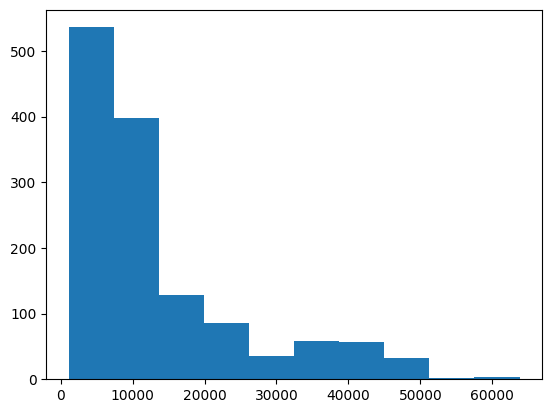

In [4]:
plt.hist(data['charges'])
plt.show()

Heavily skewed to the right, data is concentrated near 0 with many high outliers, look at a boxplot

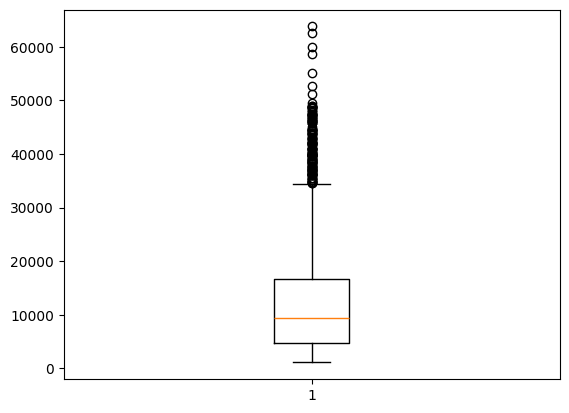

In [5]:
plt.boxplot(data['charges'])
plt.show()

We can see that our variable is highly skewed. We can correct for this issue by taking the log of our target variable.

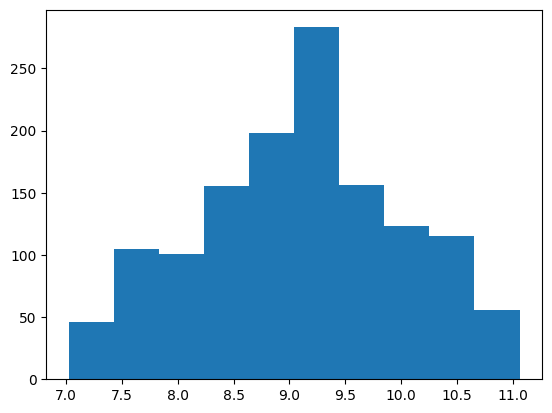

In [13]:
target = np.log(data['charges'])
plt.hist(target)
plt.show()

In [7]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

## Encoding Variables

In [16]:
# Encoding smoker or
data[["smoker"]] = OrdinalEncoder().fit_transform(data[["smoker"]])
print(data["smoker"].value_counts()) #Looks good

smoker
0.0    1064
1.0     274
Name: count, dtype: int64


In [21]:
# Label encoding(no order)
data["sex"] = LabelEncoder().fit_transform(data["sex"])
print(data["sex"].value_counts())

sex
1    676
0    662
Name: count, dtype: int64


In [22]:
# Encoding region
data["region"] = LabelEncoder().fit_transform(data["region"])
print(data["region"].value_counts())

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64


## Splitting, training model

In [11]:
# Train/tune/test split
X = data.drop(columns='charges')
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=13)
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50, random_state=72)
